# Machine/Robot vision

## Description
- Aside from the various issues that a robot faces today, one of the most important is to improve the robot's vision. In terms of Robot vision, it is necessary to make robots capable of seeing things around them and recognizing objects in the environment. The digital image processing field in computer vision has made significant contributions to the creation of various tools and techniques to improve Robot vision. Object detection is a common image processing task that involves recognizing different types of objects in an image by segmenting distinct areas of the image as a pre-processing technique. As shown below, the image (A) is the original image then (B) is the result of image pre-processing to segment different parts of the image that will be used later in object detection.

## Task 
- The task is to segment the given input image into different regions using K-means clustering. The image segmentation will group pixels with similar colors into distinct clusters.

## Explanation
1. Libraries Used:
    - cv2: OpenCV library for image processing tasks.
    - numpy: Library for numerical operations on arrays.
    - sklearn.cluster.KMeans: Class from scikit-learn library for K-means clustering.
    - matplotlib.pyplot: Library for plotting and visualization.
2. User Defined Functions: N/A
3. Image Conversion:
    - Convert image from BGR to RGB: The cv2.cvtColor() function is used to convert the input image from the default BGR (Blue-Green-Red) color space to RGB. RGB color space is commonly used in plotting and visualization.
4. Image Preparation:
    - K-means Clustering: The sklearn.cluster.KMeans class is utilized for performing K-means clustering on the image. The image pixels are flattened and passed as input to the KMeans object. The number of clusters is set to num_clusters, and n_init is explicitly set to 10 for stable results.
    - Reshape and Label Assignment: The flattened image is reshaped back to its original shape. Each pixel is assigned a label indicating its cluster membership.
    - Color Map Generation: The cluster centers obtained from K-means clustering are used to create a color map. The label image is mapped to the corresponding cluster color based on the cluster centers.
5. Explanation of Code:
    - The given input image is loaded using cv2.imread() function.
    - K-means clustering is performed on the reshaped image using KMeans class from scikit-learn. The resulting labels are reshaped back to the image shape.
    - Cluster centers are calculated using kmeans.cluster_centers_ and converted to uint8 data type.
    - The color map is generated by mapping each pixel label to the corresponding cluster color.
    - The original image and segmented image are displayed side by side using plt.imshow() and plt.subplot() functions.
6. Additional Methods Used:
    - K-means Clustering: K-means clustering is a popular unsupervised learning algorithm used for grouping data points into distinct clusters based on their similarity. In this challenge, it is applied to segment the image by grouping similar-colored pixels together.
7. Difficulty Faced and Solution:
    - Difficulty: Determining the optimal number of clusters for K-means clustering can be challenging. Choosing too few clusters may result in poor segmentation, while choosing too many clusters may lead to over-segmentation.
    - Solution: The number of clusters (num_clusters) is set to 4 in this code as a starting point. It can be adjusted based on the specific image and desired segmentation result. Experimentation with different values of num_clusters can help achieve the desired segmentation outcome.

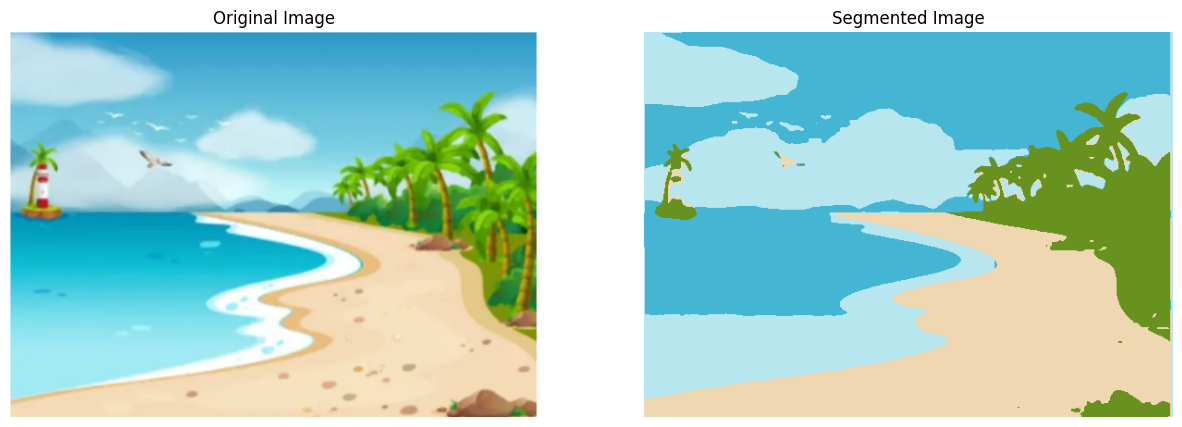

In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Path to the input image
image_path = 'Images/Island.png'

# Number of clusters for k-means
num_clusters = 4

# Load the image
image = cv2.imread(image_path)

# Perform k-means clustering
reshaped_image = image.reshape(-1, 3)  # Flatten the image
kmeans = KMeans(n_clusters=num_clusters, n_init=10)  # Explicitly set n_init
kmeans.fit(reshaped_image)
segmented_image = kmeans.labels_.reshape(image.shape[:2])

# Create a color map based on cluster centers
cluster_centers = kmeans.cluster_centers_.astype(np.uint8)
color_map = cluster_centers[segmented_image]

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
color_map = cv2.cvtColor(color_map, cv2.COLOR_BGR2RGB)
#show the image in jupyter notebook with rgb color
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('Segmented Image')
plt.imshow(color_map)
plt.show()